# 네거티브 샘플링을 이용한 Skip-gram 구현

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups  #Twenty Newsgroups이라고 불리는 20개의 다른 주제를 가진 뉴스그룹 데이터
from tensorflow.keras.preprocessing.text import Tokenizer

##데이터 전처리

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
# 총 샘플 수
len(documents)

11314

In [3]:
# 첫 번째 샘플 출력
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [4]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3 이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [5]:
# 빈 값(empty) 이 있으면 null 값으로 변환 후 null 값 제거
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)

In [6]:
# null 값이 제거된 것 확인
news_df.isnull().values.any()

False

In [7]:
# 불용어를 제거
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
tokenized_doc = tokenized_doc.to_list()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들을 제거.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)
print('총 샘플 수 :',len(tokenized_doc))

총 샘플 수 : 10940


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [9]:
# 모든 샘플에 대한 단어 집합 생성하면 너무 오래 걸려서 2000개만 진행
tokenized_doc_2000=tokenized_doc[:2000]

In [10]:
# 단어 집합을 생성하고, 정수 인코딩 진행
tokenizer = Tokenizer()
tokenizer.fit_on_texts (tokenized_doc_2000)

word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc_2000)

In [11]:
print(encoded[:2])

[[10, 59, 484, 167, 3005, 1432, 430, 440, 12692, 8974, 5887, 12693, 440, 640, 440, 101, 1002, 1662, 964, 8975, 1259, 641, 3265, 440, 193, 167, 1433, 8976, 8974, 2783, 3266, 113, 1434, 5, 40, 191, 577, 578, 5041, 3267, 4406, 1663, 928, 8977, 1435, 5042, 640, 866, 12694, 378, 36, 201, 2415, 7072, 170, 65, 288, 3935, 8978, 58, 5888], [1224, 455, 2, 50, 118, 407, 53, 533, 20, 67, 3563, 364, 5889, 1039, 351, 2147, 415, 12695, 415, 1930, 3936, 364, 20, 10, 4407, 8979, 164, 300, 129, 151, 668, 1260, 53, 12696, 13, 790, 12697, 12698, 5043, 8980]]


In [12]:
idx2word.items()

dict_items([(1, 'would'), (2, 'people'), (3, 'like'), (4, 'know'), (5, 'think'), (6, 'time'), (7, 'also'), (8, 'could'), (9, 'first'), (10, 'well'), (11, 'even'), (12, 'good'), (13, 'much'), (14, 'system'), (15, 'make'), (16, 'many'), (17, 'want'), (18, 'anyone'), (19, 'right'), (20, 'need'), (21, 'said'), (22, 'something'), (23, 'please'), (24, 'used'), (25, 'going'), (26, 'since'), (27, 'back'), (28, 'really'), (29, 'work'), (30, 'years'), (31, 'things'), (32, 'year'), (33, 'problem'), (34, 'last'), (35, 'drive'), (36, 'government'), (37, 'point'), (38, 'must'), (39, 'using'), (40, 'might'), (41, 'find'), (42, 'mail'), (43, 'made'), (44, 'thanks'), (45, 'without'), (46, 'space'), (47, 'believe'), (48, 'better'), (49, 'number'), (50, 'read'), (51, 'another'), (52, 'still'), (53, 'hard'), (54, 'help'), (55, 'take'), (56, 'information'), (57, 'data'), (58, 'power'), (59, 'sure'), (60, 'available'), (61, 'someone'), (62, 'program'), (63, 'come'), (64, 'long'), (65, 'look'), (66, 'case'),

In [13]:
vocab_size = len(word2idx) + 1 
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 25554


## 네거티브 샘플링을 통한 데이터셋 구성

In [14]:
from tensorflow.keras.preprocessing.sequence import skipgrams
# 네거티브 샘플링 (샘플 확인하기 위한 예시로 10개만 진행)
skip_grams = [skipgrams(sample, vocabulary_size= vocab_size ,window_size=10, negative_samples= 1.0) for sample in encoded[:10]]

In [15]:
skip_grams[0][0][:10] # [중심단어, 주변단어] 단어 쌍 반환

[[3005, 640],
 [12694, 8978],
 [3267, 17697],
 [1002, 193],
 [8976, 18428],
 [866, 7083],
 [59, 10],
 [8975, 23815],
 [440, 101],
 [1662, 8976]]

In [16]:
skip_grams[0][1][:10] # 중심단어와 주변단어의 관계이면 1, 아니면 0 반환

[1, 1, 0, 1, 0, 0, 1, 0, 1, 1]

In [17]:
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0], 
          idx2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(biased (3005), israeli (640)) -> 1
(blessing (12694), races (8978)) -> 1
(shame (3267), whopping (17697)) -> 0
(lived (1002), whole (193)) -> 1
(subsidizing (8976), dakota (18428)) -> 0
(soldiers (866), elapsed (7083)) -> 0
(sure (59), well (10)) -> 1
(incidences (8975), fmtw (23815)) -> 0
(media (440), world (101)) -> 1
(europe (1662), subsidizing (8976)) -> 1


In [18]:
print('전체 샘플 수 :',len(skip_grams))

전체 샘플 수 : 10


In [19]:
# 첫번째 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [20]:
# 30초? 정도 걸립니다
skip_grams = [skipgrams(sample, vocabulary_size= vocab_size, window_size=10) for sample in encoded]

## Skip-Gram with Negative Sampling(SGNS) 구현하기

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [22]:
# 임베딩 차원
embed_size = 50

In [23]:
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embed_size)(w_inputs) # 정수 인코딩된 단어를 입력받아 임베딩 수행

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embed_size)(c_inputs)

In [24]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        1277700     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        1277700     input_2[0][0]                    
______________________________________________________________________________________________

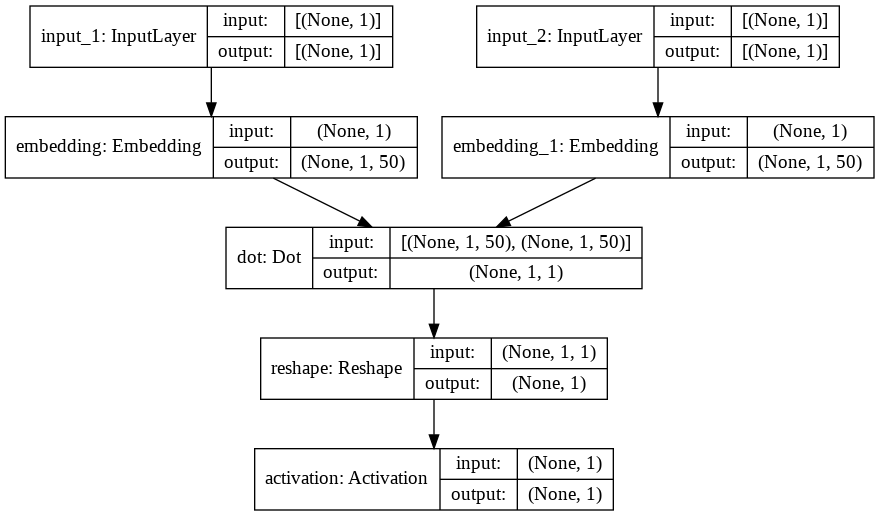

In [25]:
# 모델 구성
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [26]:
# epoch 당 1분? 정도 걸립니다
for epoch in range(1, 16):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')  # 중심 단어
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32') # 주변 단어
        labels = np.array(elem[1], dtype='int32')                     # 정답 레이블
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)  # Runs a single gradient update on a single batch of data.
    print('Epoch :',epoch, 'Loss :',loss)

Epoch : 1 Loss : 1232.0615604519844
Epoch : 2 Loss : 937.3634087890387
Epoch : 3 Loss : 845.9540064632893
Epoch : 4 Loss : 804.311294734478
Epoch : 5 Loss : 779.2803485766053
Epoch : 6 Loss : 759.1229969114065
Epoch : 7 Loss : 738.2912314236164
Epoch : 8 Loss : 713.8914850018919
Epoch : 9 Loss : 684.6864023469388
Epoch : 10 Loss : 650.585122118704
Epoch : 11 Loss : 612.8847796455957
Epoch : 12 Loss : 573.5173779837787
Epoch : 13 Loss : 534.6279913068283
Epoch : 14 Loss : 497.7406732821837
Epoch : 15 Loss : 463.87668496294646


## 결과 확인

In [27]:
import gensim

In [28]:
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embed_size))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [29]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [30]:
w2v.most_similar(positive=['soldiers'], topn=10)

[('dragging', 0.7597070932388306),
 ('persia', 0.7589030265808105),
 ('villagers', 0.758134663105011),
 ('tactics', 0.7552375197410583),
 ('israeli', 0.733030378818512),
 ('reporters', 0.7243334650993347),
 ('eoka', 0.7237909436225891),
 ('killed', 0.7174906730651855),
 ('lobby', 0.712676465511322),
 ('attacks', 0.7120687961578369)]

In [31]:
w2v.most_similar(positive=['government'])

[('princes', 0.6951316595077515),
 ('violated', 0.6776379346847534),
 ('defend', 0.6668115854263306),
 ('enet', 0.6596099138259888),
 ('encroachment', 0.6578258275985718),
 ('secure', 0.6341256499290466),
 ('demonstrated', 0.6305957436561584),
 ('rosen', 0.6210755109786987),
 ('storming', 0.6198277473449707),
 ('pervasive', 0.6085548400878906)]

In [32]:
w2v.most_similar(positive=['weather'])

[('competition', 0.670160174369812),
 ('sliding', 0.6119722723960876),
 ('detonation', 0.6061010956764221),
 ('fozzard', 0.5960822105407715),
 ('introducing', 0.582659125328064),
 ('tires', 0.5803932547569275),
 ('align', 0.5802633762359619),
 ('locality', 0.5735070109367371),
 ('vendidad', 0.5597610473632812),
 ('complain', 0.5585073232650757)]

In [33]:
w2v.most_similar(positive=['monitor'])

[('xlab', 0.6474095582962036),
 ('quadra', 0.6373307704925537),
 ('junk', 0.6276705265045166),
 ('dissected', 0.6200738549232483),
 ('brightness', 0.6100276708602905),
 ('handles', 0.6027180552482605),
 ('havoc', 0.5994354486465454),
 ('norton', 0.5962310433387756),
 ('aproximate', 0.5899965763092041),
 ('filters', 0.5885072350502014)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
findfont: Font family ['D2Coding'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


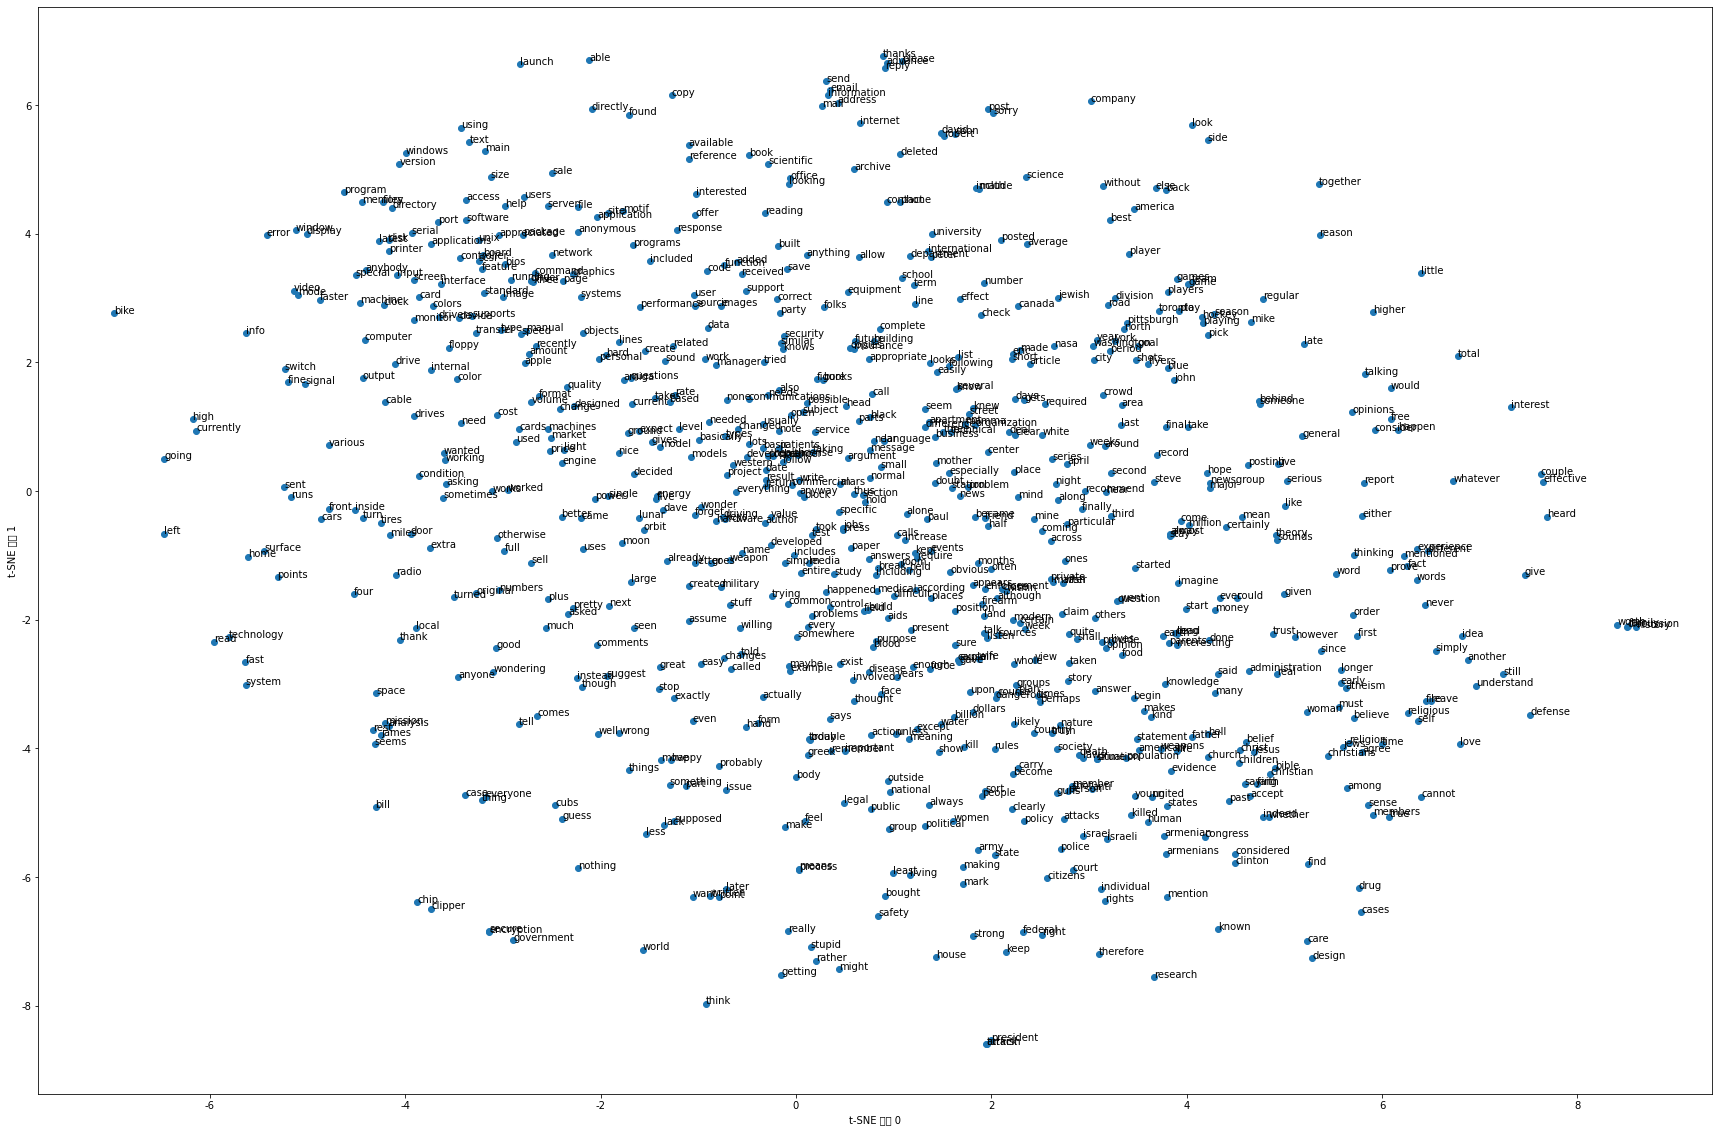

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_

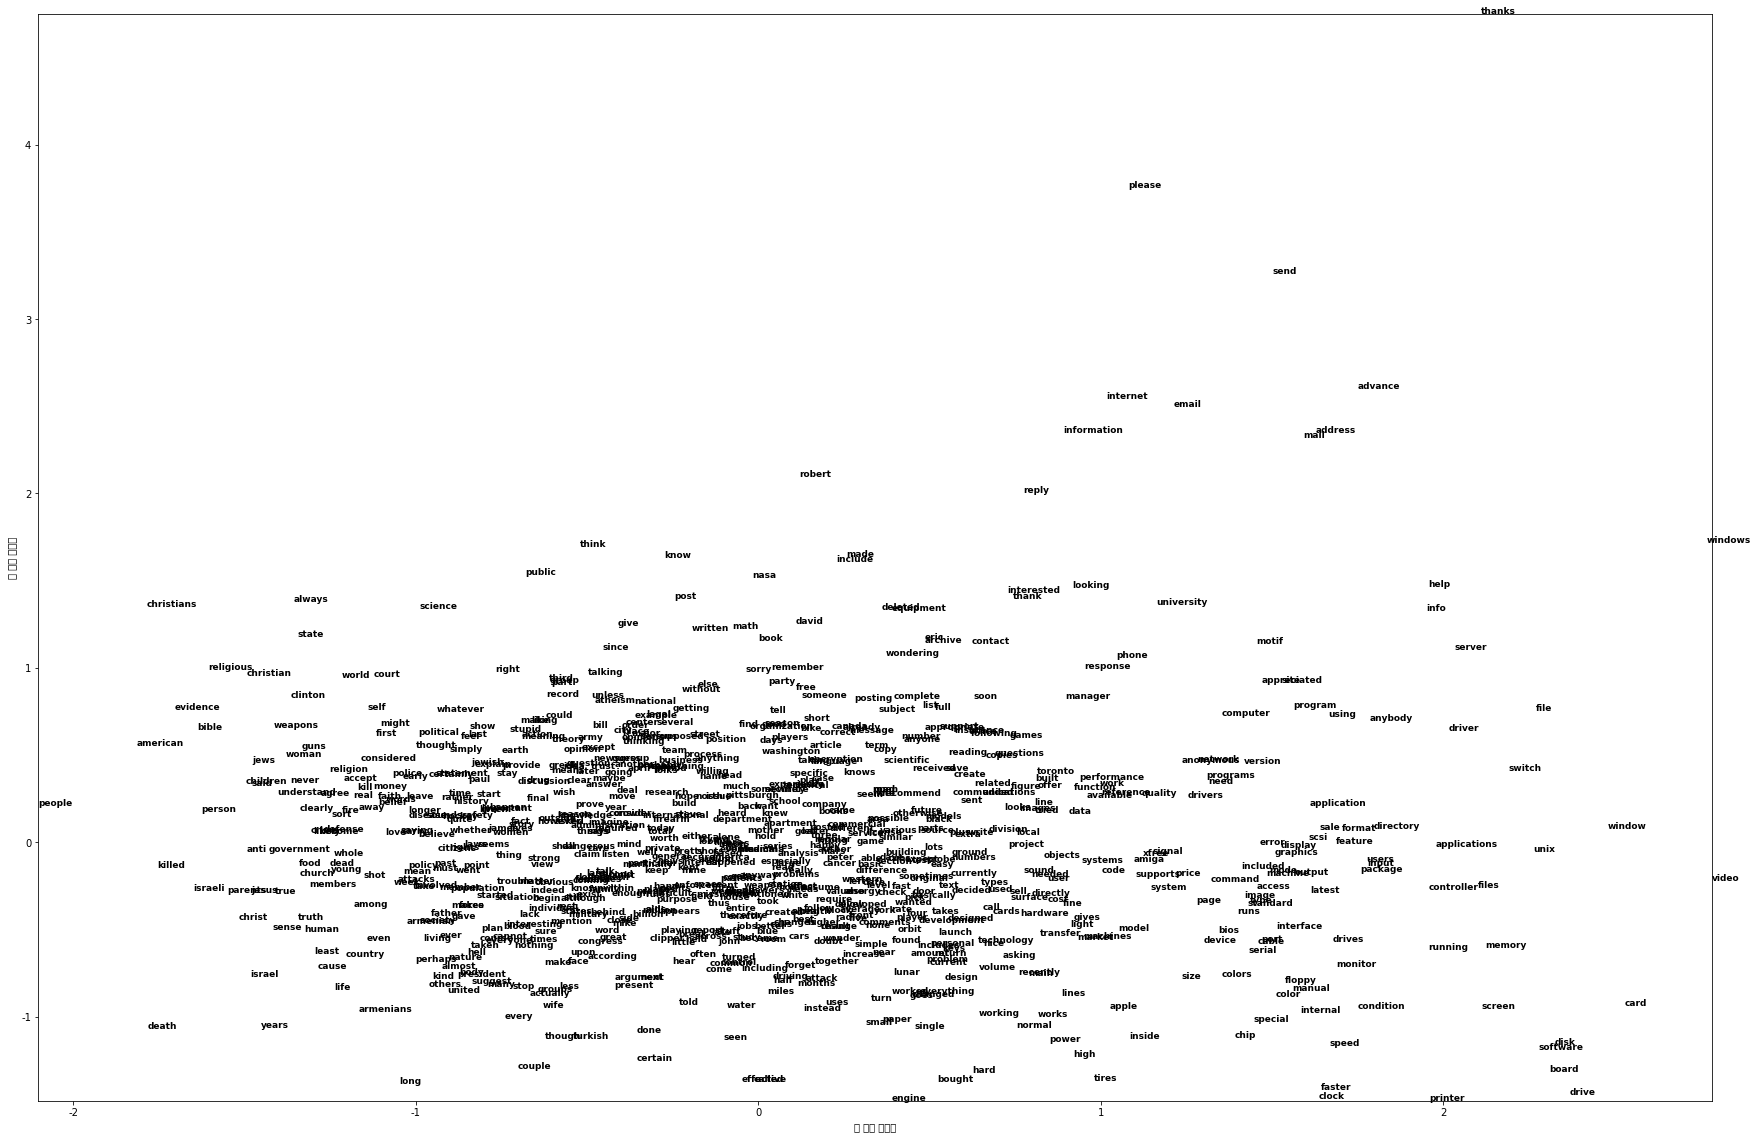

In [34]:
from sklearn.manifold import TSNE      # t-Stochastic Neighbor Embedding
from sklearn.decomposition import PCA  # Principal Component Analysis 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import pandas as pd 
from gensim.models import KeyedVectors 

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처 
mpl.rcParams['axes.unicode_minus'] = False 
plt.rc('font', family='D2Coding') 

def show_tsne(): 
  tsne = TSNE(n_components=2) 
  X = tsne.fit_transform(X_show) 
  df = pd.DataFrame(X, index=vocab_show, columns=['x', 'y']) 
  fig = plt.figure() 
  fig.set_size_inches(30, 20) 
  ax = fig.add_subplot(1, 1, 1) 
  ax.scatter(df['x'], df['y']) 
  for word, pos in df.iterrows(): 
    ax.annotate(word, pos, fontsize=10) 
  plt.xlabel("t-SNE 특성 0") 
  plt.ylabel("t-SNE 특성 1") 
  plt.show() 

def show_pca(): # PCA 모델을 생성합니다 
  pca = PCA(n_components=2) 
  pca.fit(X_show) # 처음 두 개의 주성분으로 숫자 데이터를 변환합니다 
  x_pca = pca.transform(X_show) 
  plt.figure(figsize=(30, 20)) 
  plt.xlim(x_pca[:, 0].min(), x_pca[:, 0].max()) 
  plt.ylim(x_pca[:, 1].min(), x_pca[:, 1].max()) 
  for i in range(len(X_show)): 
    plt.text(x_pca[i, 0], x_pca[i, 1], str(vocab_show[i]), fontdict={'weight': 'bold', 'size': 9}) 
  plt.xlabel("첫 번째 주성분") 
  plt.ylabel("두 번째 주성분") 
  plt.show() 

model_name = '/content/vectors.txt' 
model = KeyedVectors.load_word2vec_format(model_name) 
vocab = list(model.wv.vocab) 
X = model[vocab] 
# n 개의 단어에 대해서만 시각화 
n = 800 
X_show = X[:n,:] 
vocab_show = vocab[:n] 
show_tsne() 
show_pca()